Importing Libraries

In [13]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

Importing the dataset from drive

In [14]:
#importing the dataset
train=pd.read_csv('D:\WORK\SIGN LANGUAGE ALPHABET RECOGNITION USING\sign_mnist_train.csv\sign_mnist_train.csv')
test=pd.read_csv('D:\WORK\SIGN LANGUAGE ALPHABET RECOGNITION USING\sign_mnist_test.csv\sign_mnist_test.csv')

In [15]:
print(train.shape)
print(test.shape)


(27455, 785)
(7172, 785)


In [16]:
train.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Plotting the graph to see the frequency of each label and visualize if the the dataset is balanced or not

C:\Users\imson\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

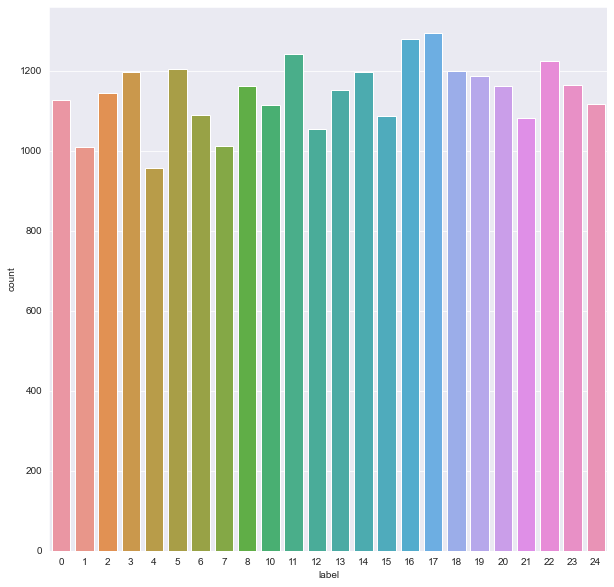

In [17]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train['label'])

Create training and testing arrays

In [18]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')


Specifying class labels

In [19]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]


Visualizing random image for class label verification

(-0.5, 27.5, 27.5, -0.5)

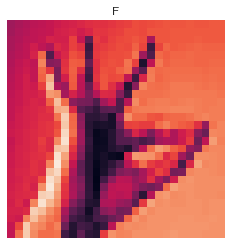

In [20]:
#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28)))
plt.imshow(train_set[i,1:].reshape((28,28)))
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')


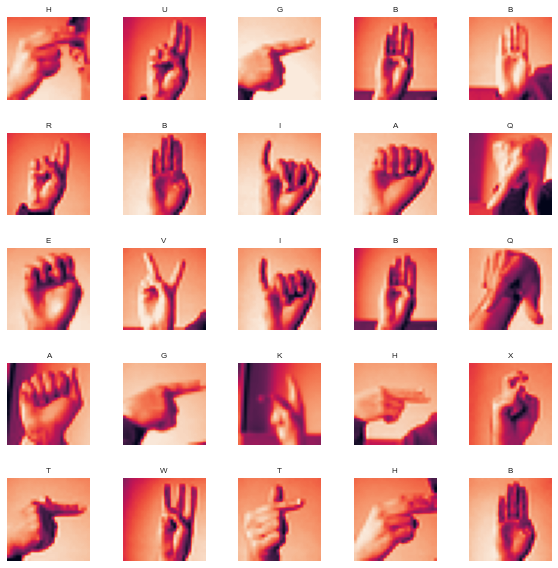

In [21]:
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flatten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables
 # Select a random number
 index = np.random.randint(0, n_train)
 # read and display an image with the selected index
 axes[i].imshow( train_set[index,1:].reshape((28,28)) )
 label_index = int(train_set[index,0])
 axes[i].set_title(class_names[label_index], fontsize = 8)
 axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


In [22]:
# Prepare the training and testing dataset
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]
X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]


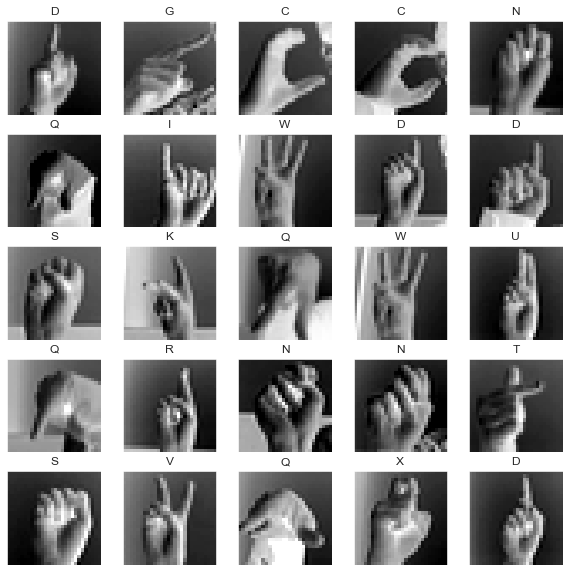

In [23]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
 plt.subplot(5, 5, i + 1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
 label_index = int(y_train[i])
 plt.title(class_names[label_index])
plt.show()


Splitting of the training set into training and validation set

In [24]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)
print(X_train.shape)
print(y_train.shape)


(21964, 784)
(21964,)


Umpacking of the training and test tuple

In [25]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)


(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


Data Augmentation

In [26]:
# With data augmentation to prevent overfitting
datagen = ImageDataGenerator(
 featurewise_center=False, # set input mean to 0 over the dataset
 samplewise_center=False, # set each sample mean to 0
 featurewise_std_normalization=False, # divide inputs by std ofthe dataset
 samplewise_std_normalization=False, # divide each input by its std
 zca_whitening=False, # apply ZCA whitening
 rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
 zoom_range = 0.1, # Randomly zoom image
 width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
 height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
 horizontal_flip=False, # randomly flip images
 vertical_flip=False) # randomly flip images
datagen.fit(X_train)


In [27]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [28]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [29]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [30]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [31]:
#Training the CNN model
history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 512), epochs = 20, verbose=1, validation_data = (X_validate, y_validate),callbacks=[learning_rate_reduction])

Epoch 1/20
43/43 [==============================] - 21s 131ms/step - loss: 2.4318 - accuracy: 0.2887 - val_loss: 3.2494 - val_accuracy: 0.1031
Epoch 2/20
43/43 [==============================] - 4s 104ms/step - loss: 0.7254 - accuracy: 0.7582 - val_loss: 3.3080 - val_accuracy: 0.0453
Epoch 3/20
43/43 [==============================] - 4s 103ms/step - loss: 0.3499 - accuracy: 0.8843 - val_loss: 3.3136 - val_accuracy: 0.0453

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
43/43 [==============================] - 4s 102ms/step - loss: 0.1996 - accuracy: 0.9348 - val_loss: 3.3508 - val_accuracy: 0.0488
Epoch 5/20
43/43 [==============================] - 4s 101ms/step - loss: 0.1530 - accuracy: 0.9514 - val_loss: 3.1866 - val_accuracy: 0.2191
Epoch 6/20
43/43 [==============================] - 4s 103ms/step - loss: 0.1227 - accuracy: 0.9595 - val_loss: 3.1722 - val_accuracy: 0.2419
Epoch 7/20
43/43 [==============================] - 4s 103ms/step 

Visualizing the training performance

Text(0.5, 1.0, 'Accuracy evolution')

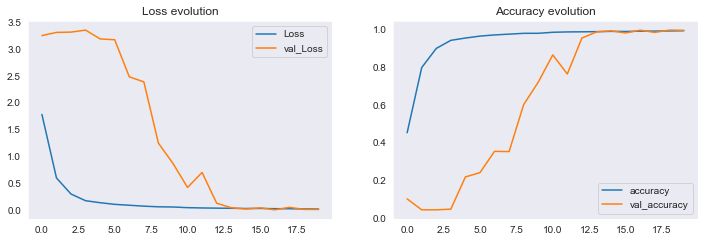

In [32]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

Predicting on test set

In [33]:
#Predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

C:\Users\imson\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


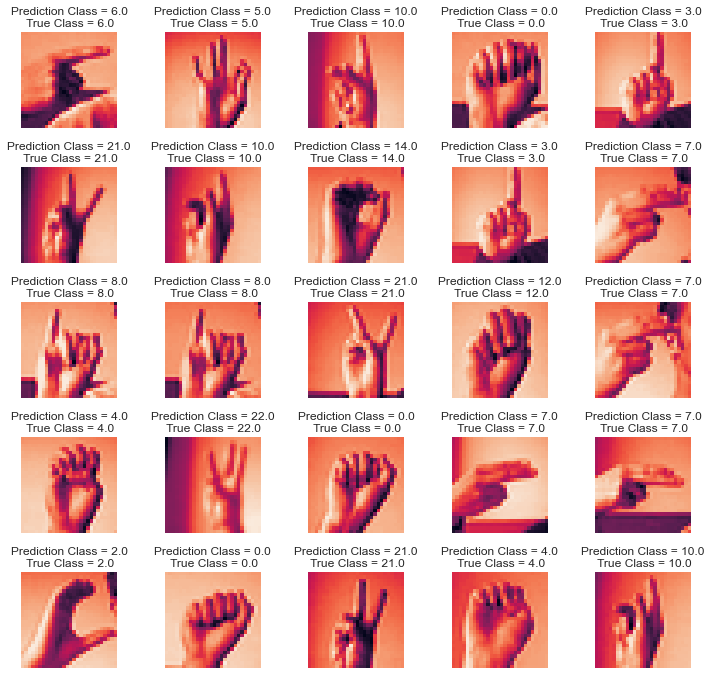

In [34]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

In [36]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

In [37]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K','L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

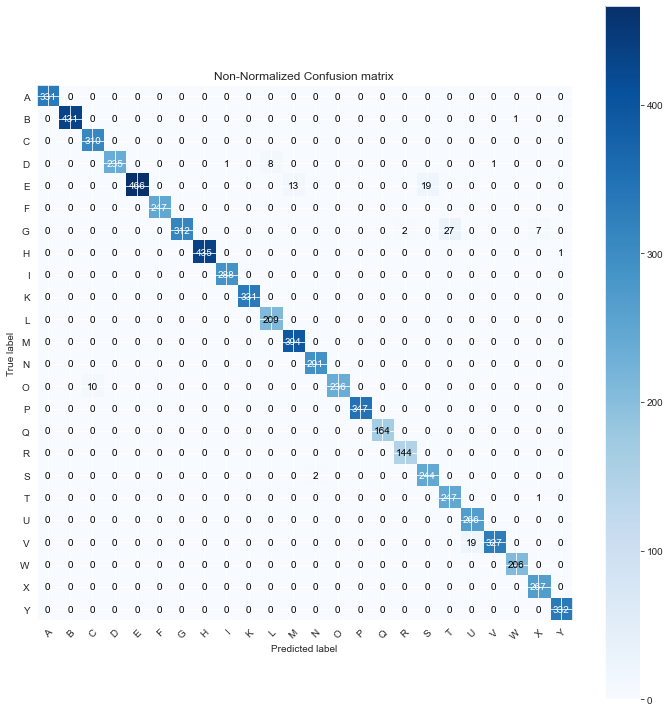

In [38]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 2520x2520 with 0 Axes>

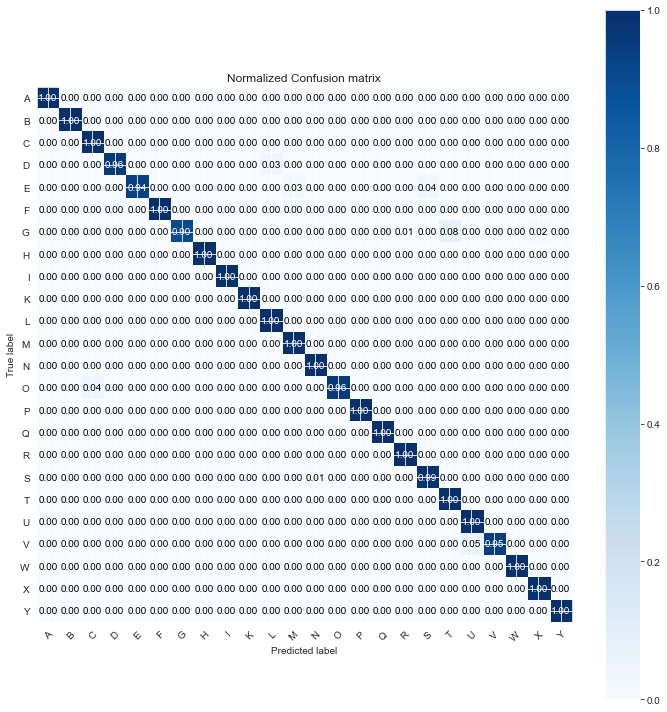

In [39]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, normalize=True, title='Normalized Confusion matrix')
plt.show()

Classification Report

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(classification_report(y_test, predicted_classes))
print("Accuracy:",accuracy_score(y_test, predicted_classes)*100)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       331
         1.0       1.00      1.00      1.00       432
         2.0       0.97      1.00      0.98       310
         3.0       1.00      0.96      0.98       245
         4.0       1.00      0.94      0.97       498
         5.0       1.00      1.00      1.00       247
         6.0       1.00      0.90      0.95       348
         7.0       1.00      1.00      1.00       436
         8.0       1.00      1.00      1.00       288
        10.0       1.00      1.00      1.00       331
        11.0       0.96      1.00      0.98       209
        12.0       0.97      1.00      0.98       394
        13.0       0.99      1.00      1.00       291
        14.0       1.00      0.96      0.98       246
        15.0       1.00      1.00      1.00       347
        16.0       1.00      1.00      1.00       164
        17.0       0.99      1.00      0.99       144
        18.0       0.93    

#AUC Score

In [41]:
predicted_classes.shape


(7172,)

In [42]:
y_test.shape


(7172,)

Converting to one Hot encoded Vector

In [43]:
#Convert To One Hot encoded Vector
labels = np.zeros((y_test.shape[0],25))

temp = pd.DataFrame(labels)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
for i in range(y_test.shape[0]):
    index = int(y_test[i])
    labels[i][index] = 1
    

In [45]:
print(labels.shape)

(7172, 25)


In [46]:
temp = pd.DataFrame(y_test)
temp.head()


,0
0,6.0
1,5.0
2,10.0
3,0.0
4,3.0


In [47]:
temp = pd.DataFrame(labels)
temp.head() 


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
def convert_to_one_hot_encoded(y):
    output_classes = 25
    labels = np.zeros((y.shape[0],output_classes))
    for i in range(y.shape[0]):
        index = int(y[i])
        labels[i][index] = 1
    return labels

AUC Score

In [49]:
from sklearn.metrics import roc_auc_score

predictions = convert_to_one_hot_encoded(predicted_classes)    
y_actual = convert_to_one_hot_encoded(y_test)      

scores =  []
for i in range(y_actual.shape[0]):
    scores.append(roc_auc_score(y_actual[i],predictions[i]))

scores = np.array(scores)
print(np.mean(scores)*100)

99.18665179401376
